# Code: Tokenization(Sentences)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize

example_string = """
Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""

sent_tokenize(example_string)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


["\nMuad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

# Code: Tokenization(Words)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

example_string = """
Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""

word_tokenize(example_string)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

# Code: Tokenization(N-Grams)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.util import ngrams

example_string = """
Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""

tokens = word_tokenize(example_string)
bigrams = list(ngrams(tokens, 2))

# Print bigrams
for bg in bigrams:
    print(bg)

("Muad'Dib", 'learned')
('learned', 'rapidly')
('rapidly', 'because')
('because', 'his')
('his', 'first')
('first', 'training')
('training', 'was')
('was', 'in')
('in', 'how')
('how', 'to')
('to', 'learn')
('learn', '.')
('.', 'And')
('And', 'the')
('the', 'first')
('first', 'lesson')
('lesson', 'of')
('of', 'all')
('all', 'was')
('was', 'the')
('the', 'basic')
('basic', 'trust')
('trust', 'that')
('that', 'he')
('he', 'could')
('could', 'learn')
('learn', '.')
('.', 'It')
('It', "'s")
("'s", 'shocking')
('shocking', 'to')
('to', 'find')
('find', 'how')
('how', 'many')
('many', 'people')
('people', 'do')
('do', 'not')
('not', 'believe')
('believe', 'they')
('they', 'can')
('can', 'learn')
('learn', ',')
(',', 'and')
('and', 'how')
('how', 'many')
('many', 'more')
('more', 'believe')
('believe', 'learning')
('learning', 'to')
('to', 'be')
('be', 'difficult')
('difficult', '.')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Tokenization: Regular Expressions

In [ ]:
from nltk.tokenize import RegexpTokenizer

my_text = "Hi Mr. Smith! I'm going to buy some vegetables (tomatoes"
" and cucumbers) from the store. Should I pick up some black-eyed " \
"peas as well?"

whitespace_tokenizer = RegexpTokenizer("\s+", gaps=True)
print(whitespace_tokenizer.tokenize(my_text))

['Hi', 'Mr.', 'Smith!', "I'm", 'going', 'to', 'buy', 'some', 'vegetables', '(tomatoes']


In [ ]:
from nltk.tokenize import RegexpTokenizer

cap_tokenizer = RegexpTokenizer("[A-Z]['\w]+")
print(cap_tokenizer.tokenize(my_text))

['Hi', 'Mr', 'Smith', "I'm"]


# TokenizationSummary

With tokenization, we were able to break this messy text data down into small units for us
 to do analysis

*   By sentence, word, n-grams
*   By characters and patterns using regularexpression

# Zipf’s Law and Word Frequency

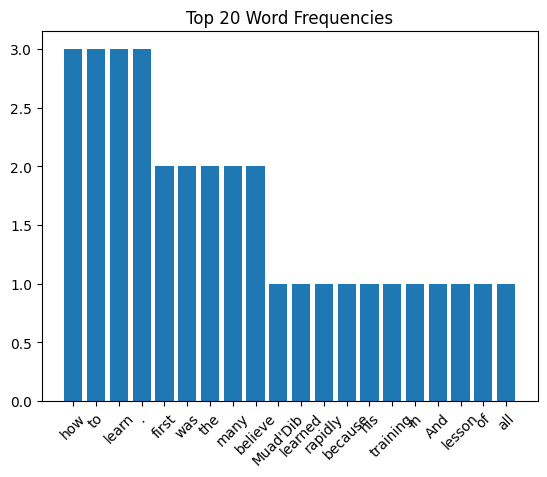

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

freq = Counter(tokens)
most_common = freq.most_common(20)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Word Frequencies")
plt.show()


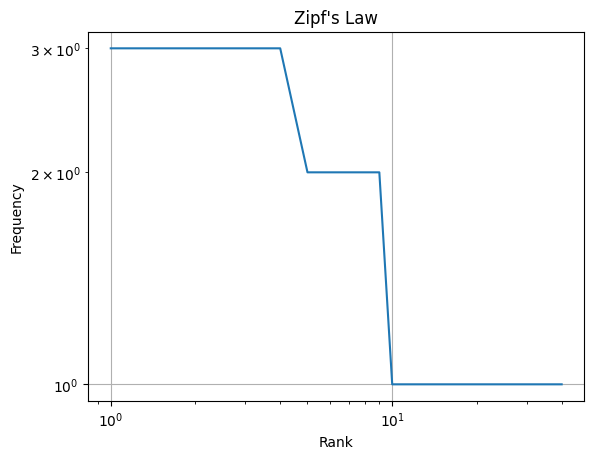

In [ ]:
import numpy as np

ranks = np.arange(1, len(freq)+1)
frequencies = np.array(sorted(freq.values(), reverse=True))

plt.loglog(ranks, frequencies)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Zipf's Law")
plt.grid(True)
plt.show()


# Maximum Matching Algorithm

In [ ]:
wordlist = {"the", "cat", "in", "the", "hat"}
text = "thecatinthehat"

def max_match(text, wordlist):
    if not text:
        return []
    for i in range(len(text), 0, -1):
        first = text[:i]
        if first in wordlist:
            return [first] + max_match(text[i:], wordlist)
    return [text]

print(max_match(text, wordlist))


['the', 'cat', 'in', 'the', 'hat']


# Normalize Arabic

In [ ]:
import re

text = "Mr. Smith bought 2lbs of tomatoes and 5 cucumbers."
text = re.sub(r'\d+', '', text)  # remove digits
text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
text = text.lower()
print(text)


mr smith bought lbs of tomatoes and  cucumbers


In [ ]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ي", text)
    return text

arabic = "إِنَّ الَّذِينَ آمَنُوا وَعَمِلُوا الصَّالِحَاتِ"
print(normalize_arabic(arabic))


اِنَّ الَّذِينَ امَنُوا وَعَمِلُوا الصَّالِحَاتِ
